In [5]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, 2:] #we only take petal length(cm) and petal width(cm)
y = iris.target

Automatically created module for IPython interactive environment


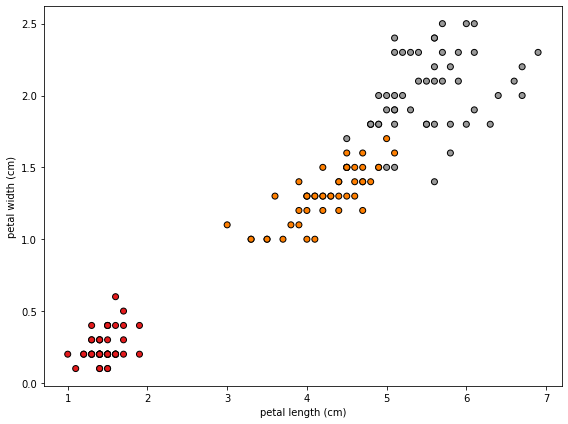

In [6]:
fig = plt.figure(2, figsize=(8,6))
ax = fig.add_subplot()

ax.set_xlabel(iris.feature_names[2])
ax.set_ylabel(iris.feature_names[3])

ax.set_axisbelow(True)

ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolors='k')

plt.tight_layout()
plt.show()

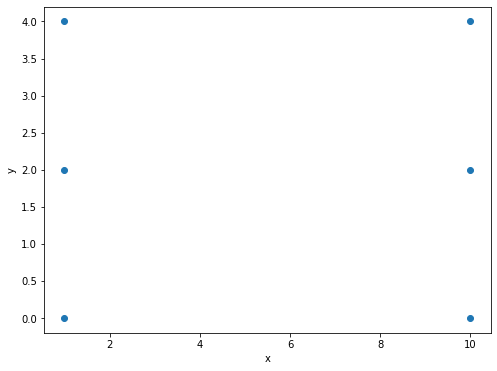

In [7]:
from sklearn.cluster import KMeans
import numpy as np

X = np.array([[1, 2], [1, 4], [1, 0],[10, 2], [10, 4], [10, 0]])

fig = plt.figure(2,figsize=(8,6))
ax = fig.add_subplot()

ax.set_xlabel('x')
ax.set_ylabel('y')

ax.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
import src.processing as processing
import pandas as pd
from scipy.io import arff

names_lst = processing.get_data_names()
raw_lst = processing.get_data_paths()

print(raw_lst)
name = raw_lst[1]
data = arff.loadarff(name)
df = pd.DataFrame(data[0])

df.head()

if("datatrieve" in name):
    df_pos = df.loc[df['Faulty6_1'] == b'0']
    df_neg = df.loc[df['Faulty6_1'] == b'1']
else:
    df_pos = df.loc[df['defects'] == b'false']
    df_neg = df.loc[df['defects'] == b'true']

X_pos = df_pos.iloc[:, :-1].values
y_pos = df_pos.iloc[:, -1].values.astype('str')
X_neg = df_neg.iloc[:, :-1].values
y_neg = df_neg.iloc[:, -1].values.astype('str')

# df = df.loc[df['Faulty6_1'] == b'1']


# df.iloc[:, -1].values.astype('str')
df.head()

In [ ]:
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

print(iris.target)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

[0.         0.07142857 1.        ]
[0.         0.94444444 1.        ]
[2. 1. 0.]


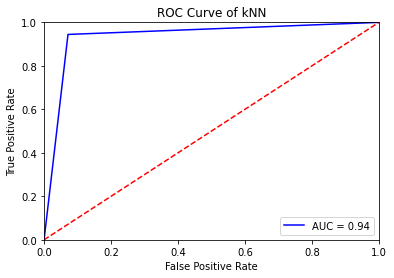

In [21]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt

X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train,y_train)
# print(knn.classes_)

y_scores = knn.predict_proba(X_test)
# print(y_scores)
# print(y_scores[:,1])
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
print(fpr)
print(tpr)
print(threshold)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [ ]:
import matplotlib.pyplot as plt  
from sklearn import datasets, metrics, model_selection, svm
X, y = datasets.make_classification(random_state=0)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=0)
clf = svm.SVC(random_state=0)
clf.fit(X_train, y_train)
print(X_test.shape)
print(y_test.shape)
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()  